# Artificial Intelligence in the public eye

It is undentiable that Artificial Intelligence is one of the most rapidly developing fields in computer science, and with all of its connotations and implications, the public's view of Artificial Intelligence is extremely important.

Is Artificial Intelligence dangerous? Will it destroy humanity? Will it send humanity into a golden age? These are all questions that people tend to think about when they hear the phrase 'AI', and the answers to these questions are currently unknown. What is known is that all of these questions have yes as a possible answer. AI could destroy humanity, and AI could save humanity. AI could also fizzle out and reveal itself to be an impossible problem to solve. At the moment, its impossible to say what will happen, but at best, its mysterious. The problem of AI carries numerous important questions that touch on some of the most important questions for a person, most notably, what even constitutes consciousness? With these implications, its no wonder AI has captured the public interest.

Movies like Terminator and 2001: A Space Odyssey demonize the possibility of AI, and the cliche tends to be that AI will become evil, that it will be cold and unemotional, yet perfectly efficient. Is this the truth? Again, the answer is amgiguous, but the public perception of AI is going to be important in its development. Perhaps rampant fear of AI would lead to strong regulation in its development, and hamper research, or maybe optimism about AI leads to it developing too fast, and the cataclysmic cliche comes to pass. Regardless of what the truth of AI may be, public perception will be important no matter what, and looking at how that public perception has changed over time, and what exactly in AI people worry about, will reveal the trend of the public's viewpoint into the future.

## Reading the dataset

To start with, we must import the data from the .csv file

In [1]:
import pandas as pd
import datetime
import numpy as np

In [2]:
dataset = pd.read_csv("robot-ai-all-public.csv")

So what exactly does this dataset look like?

In [3]:
dataset.head()

,Article ID,Article Date,Paragraph number,NYT section,Paragraph,Title,WorkTimeInSeconds,AI Mood,AI Relevance,Fiction,...,Other (negative),Cyborg (positive),Decisions (positive),Education (positive),Entertain (positive),Healthcare (positive),Singularity (positive),Transportation (positive),Work (positive),Other (positive)
0,4fd1cbc98eb7c8105d701286,1996-10-06 00:00:00 UTC,18,New York and Region,"Thus, next weekend will feature the robot who ...",LONG ISLAND JOURNAL,1472,4,5,0,...,{},0,0,0,0,0,0,0,0,{}
1,4fd1cbc98eb7c8105d701286,1996-10-06 00:00:00 UTC,18,New York and Region,"Thus, next weekend will feature the robot who ...",LONG ISLAND JOURNAL,49,4,5,0,...,{},0,0,0,0,0,0,0,0,{}
2,4fd1cbc98eb7c8105d701286,1996-10-06 00:00:00 UTC,18,New York and Region,"Thus, next weekend will feature the robot who ...",LONG ISLAND JOURNAL,66,5,5,0,...,{},0,0,0,1,0,0,0,0,{}
3,54b0793b7988100e21965770,2006-07-31 00:00:00 UTC,16,Technology,That phrase was coined in the 1970۪s by Masahi...,Camera System Creates Sophisticated 3-D Effects,3053,3,4,0,...,{},0,0,0,0,0,0,0,0,{}
4,54b0793b7988100e21965770,2006-07-31 00:00:00 UTC,16,Technology,That phrase was coined in the 1970۪s by Masahi...,Camera System Creates Sophisticated 3-D Effects,25,3,4,0,...,{},0,0,0,0,0,0,0,0,{}


As we can see, this dataset is organized so that it gives us the date of the article, the NYT section, the general AI Mood and the AI Relevance. It also tells us whether it has a positive or negative mood about AI (using a 5 point scale with 3 being neutral, 5 being very positive, 5 being very negative) and how related the article is to AI (again, using a 5-point scale). We are also given a binary indicator in the dataset telling us whether or not the article includes ficitonal examples of AI (Fiction).

Then, for each article, the dataset gives a binary indicator of if there is negative or positive sentiment for each of the following categories: Human combination with AI (Cyborg), Ethics in AI (Ethics), Military use of AI (Military), Societal Progress using AI (Progress), the AI Singularity (Singularity), and how AI will effect Work (Work). These categories are what we will use to measure not only the general sentiment of AI, but also to try to do some prediction of the trends of AI into the future.

There is also some metadata included that we will remove, for it is not relevant in our analysis.

Let's start cleaning up the dataset. From the first 7 columns, we remove everything except for date and NYT Section, because those columns are not important. We also can drop the 'other' categories for positive and negative viewpoints on AI, because we wont use those in this analysis.

In [4]:

dataset = dataset.drop(columns=['Article ID', 'Paragraph number', 'Paragraph', 'Title', 'WorkTimeInSeconds'])

dataset = dataset.drop(columns=['Other (negative)', 'Other (positive)'])

Next, we will convert the Article Date into a DateTime object, since DateTime Objects are much easier to work with for graphical and analytical purposes.
We will also make a new column that stores just the year the article was published.

In [5]:
dates = []
years = []

for i in dataset.iterrows():
    new_date = list(i)[1][0]
    
    if isinstance(new_date, float):
        new_datetime = datetime.date(1, 1, 1)
        year = 1
    else:
        new_date = new_date.split(" ")
        new_date = new_date[0].split("-")
        
        if len(new_date) == 3:
            new_datetime = datetime.date(int(new_date[0]), int(new_date[1]), int(new_date[2]))
            year = int(new_date[0])
        else:
            new_datetime = datetime.date(1, 1, 1)
            year = 1
    
    dates.append(new_datetime)
    years.append(year)

dataset["DateTimes"] = dates
dataset["Year"] = years

We would also like to remove all of the articles that don't have a date attached to them. In the previous code where we converted the date to DateTime objects, I simply encoded these dates as 1/1/1, which is very easy to check for. So all we do now is create a new dataset that only includes articles with dates.

In [6]:
new_dataset = []

for i in dataset.iterrows():
    date = list(i)[1][20]
    
    # The year is only 1 if there was no date, so we include this article if the date didn't have a year of 1
    if date.year != 1:
        new_dataset.append(list(i)[1])

dataset = pd.DataFrame(new_dataset)

In [7]:
dataset.head()

,Article Date,NYT section,AI Mood,AI Relevance,Fiction,Controling AI (negative),Cyborg (negative),Ethics (negative),Military (negative),Progress (negative),...,Cyborg (positive),Decisions (positive),Education (positive),Entertain (positive),Healthcare (positive),Singularity (positive),Transportation (positive),Work (positive),DateTimes,Year
0,1996-10-06 00:00:00 UTC,New York and Region,4,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1996-10-06,1996
1,1996-10-06 00:00:00 UTC,New York and Region,4,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1996-10-06,1996
2,1996-10-06 00:00:00 UTC,New York and Region,5,5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1996-10-06,1996
3,2006-07-31 00:00:00 UTC,Technology,3,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2006-07-31,2006
4,2006-07-31 00:00:00 UTC,Technology,3,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2006-07-31,2006


# Data Visualization and Exploratory Analysis

Now that we have the data cleaned up and ready to use, we will start by graphing the data in a few different ways so that we can get a good look at the data in an easier to understand way.

First, we will do a basic graph of the general sentiment on AI over time in a scatterplot. Since there are so many datapoints, we will only graph a random sample size of the data.

<AxesSubplot:xlabel='Year', ylabel='AI Mood'>

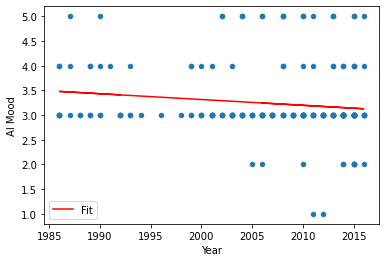

In [8]:
sampled_dataset = dataset.sample(200)

pfit = np.polyfit(sampled_dataset['Year'], sampled_dataset['AI Mood'], 1)
func = np.poly1d(pfit)

sampled_dataset.insert(21, "Fit", func(sampled_dataset["Year"]))

plt = sampled_dataset.plot.scatter(x = "Year", y = "AI Mood")
sampled_dataset.plot(x = "Year", y = "Fit", color = "Red", ax=plt)


As we can see, there is a slight trend downwards in the general opinion on AI, but it does remain slightly above three, which means it stays positive. However, there do also seem to be quite a lot of neutral articles that have been written, which may be polluting our data, so lets try only graphing articles that have either a positive or a negative view on AI (A.K.A. only articles with an AI Mood of 1, 2, 4 or 5).

In [9]:
temp_data = []

for i in dataset.iterrows():
    mood = list(i)[1][2]
    
    if mood != 3:
        temp_data.append(list(i)[1])
        
test_dataset = pd.DataFrame(temp_data)

Now we will run the analysis again to see if we get a different result.

<AxesSubplot:xlabel='Year', ylabel='AI Mood'>

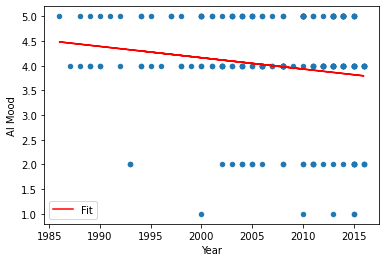

In [10]:
sampled_dataset = test_dataset.sample(200)

pfit = np.polyfit(sampled_dataset['Year'], sampled_dataset['AI Mood'], 1)
func = np.poly1d(pfit)

sampled_dataset.insert(21, "Fit", func(sampled_dataset["Year"]))

plt = sampled_dataset.plot.scatter(x = "Year", y = "AI Mood")
sampled_dataset.plot(x = "Year", y = "Fit", color = "Red", ax=plt)

As we can see, if we remove all of the neutral articles, then the trend becomes a little bit more clear. Not only are articles generally positive around the 90's, but the trend downwards as we get closer to modern day is pronounced. 

Of course, linear regression is not the only method of analysis we can do, and one thing that we may notice in this graph is that it seems based on an eye test that there are more 1 and 2 level articles in 2005 and onwards compared to before, so even if the average hasn't decreased that much, perhaps there is more extreme negativity in general.

So, for the next graph we will graph the number of 1 Mood Articles per year, and the number of 1 Mood Articles per year in an attempt to see if, despite growing optimism about AI, there is also more fear.

<AxesSubplot:title={'center':'Positive Articles per Year'}, xlabel='Year', ylabel='Number of Very Positive Articles'>

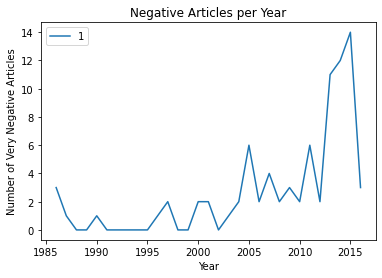

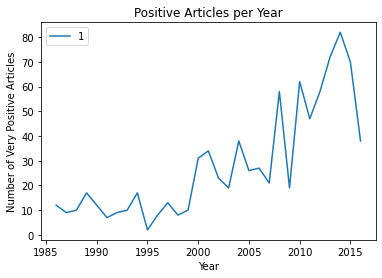

In [11]:
temp_data = []

num_of_ones = np.zeros(31)
num_of_fives = np.zeros(31)

for i in dataset.iterrows():
    mood = list(i)[1][2]
    
    if mood == 1:
        num_of_ones[list(i)[1][21] - 1986] = num_of_ones[list(i)[1][21] - 1986] + 1
    elif mood == 5:
        num_of_fives[list(i)[1][21] - 1986] = num_of_fives[list(i)[1][21] - 1986] + 1
        
new_dataframe_ones = []
new_dataframe_fives = []
y = 1986

for i in num_of_ones:
    new_dataframe_ones.append([y, i])
    
    y += 1

y = 1986

for i in num_of_fives:
    new_dataframe_fives.append([y, i])
    
    y += 1

test_dataset_ones = pd.DataFrame(new_dataframe_ones)
test_dataset_ones.plot(x = 0, y = 1, xlabel = "Year", ylabel = "Number of Very Negative Articles", title = "Negative Articles per Year")

test_dataset_fives = pd.DataFrame(new_dataframe_fives)
test_dataset_fives.plot(x = 0, y = 1, xlabel = "Year", ylabel = "Number of Very Positive Articles", title = "Positive Articles per Year")

So as we can see, for both positive and negative articles, the number increased substantially, which is not surprising. However, one interesting phenomenon is how around the year 2000 is when the number of positive articles sharply increased, while only in the year 2005 did the number of negative articles increase. This fits the idea that with all of the positive hope about AI comes a delayed  sense of foreboading about its future. It seems like for a while, there is lots of talk about the positives, but it takes some time for people to realize the negatives of AI. Also something noteworthy is that, from 2012 to 2015, there was an extremely sharp increase in negative articles, much moreso than positive articles. This could mean that negativity is increasing at a much faster rate in recent years compared to positivty.